In [1]:
import numpy as np
import string
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('qald-7-train.csv')
df_test = pd.read_csv('qald-7-test.csv')

In [4]:
df_train.head()

,questions,lang
0,When was the Battle of Gettysburg?,en
1,Quando foi a batalha de Gettysburg?,pt_BR
2,Wann fand die Schlacht von Gettysburg statt?,de
3,¿Cuándo tuvo lugar la batalla de Gettysburg?,es
4,Quando ha avuto luogo la battaglia di Gettysburg?,it


In [5]:
df_train.shape

(1983, 2)

In [6]:
df_test.head()

,questions,lang
0,Are there any castles in the United States?,en
1,NaN,fa
2,Gibt es irgendwelche Schlösser in den Vereinig...,de
3,NaN,es
4,Ci sono castelli negli Stati Uniti?,it


In [7]:
df_test=df_test.dropna(subset=['questions'])

In [8]:
df_test.shape

(172, 2)

In [9]:
df_train["lang"].unique()

array(['en', 'pt_BR', 'de', 'es', 'it', 'fr', 'nl', 'hi_IN', 'ro', 'fa'],
      dtype=object)

In [10]:
# English, German, Spanish, Italian, French, Dutch, Romanian
# {'en': 0, 'de': 1, 'es': 2, 'it': 3, 'fr': 4, 'nl': 5, 'ro': 6}

In [11]:
columns = ['pt_BR','hi_IN','fa']
for col in columns:
    df_train = df_train[df_train.lang!=col]
    df_test = df_test[df_test.lang!=col]

In [12]:
df = pd.concat([df_test, df_train], ignore_index=True)

In [13]:
df["questions"].isnull().sum()

0

In [14]:
def preprocess(text):
    
    preprocessed_text = text.lower().replace('-', ' ')
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits)
    preprocessed_text = text.translate(translation_table)
    
    return preprocessed_text

In [15]:
df['questions'] = [preprocess(text) for text in df['questions'].values]

In [16]:
vectorizer = CountVectorizer()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['questions'],
    df['lang'],
    test_size=0.20,
    shuffle=True,
    stratify=df['lang'],
    random_state=7
)

In [18]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
naive_classifier = MultinomialNB(fit_prior=False,alpha=0.01)
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.01, fit_prior=False)

In [20]:
predictions = naive_classifier.predict(X_test)

In [21]:
# 0.9294478527607362

In [22]:
accuracy_score(y_test, predictions)

0.9294478527607362

In [23]:
y_train.unique()

array(['it', 'fr', 'ro', 'es', 'nl', 'en', 'de'], dtype=object)

In [24]:
y_test.unique()

array(['nl', 'de', 'it', 'en', 'es', 'fr', 'ro'], dtype=object)

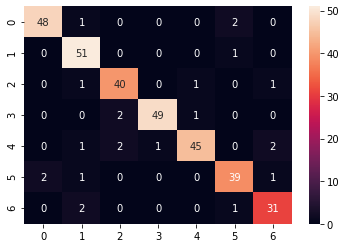

In [25]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d");